In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic=sns.load_dataset("titanic") 

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# data understanding

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

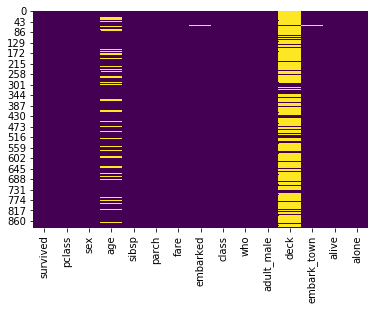

In [7]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')
#tells us that few ages are missing and lots of deck and few embarked

In [8]:
titanic['age'].isnull().sum()/titanic.shape[0]*100
# how many % of age is missing

19.865319865319865

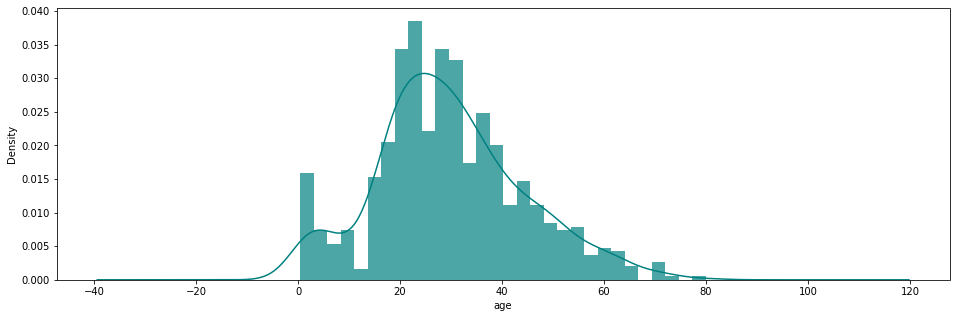

In [9]:
ax=titanic['age'].hist(bins=30,density=True,stacked=True,color='teal',alpha=0.7,figsize=(16,5))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('age')
plt.show()

Text(0.5, 1.0, 'male')

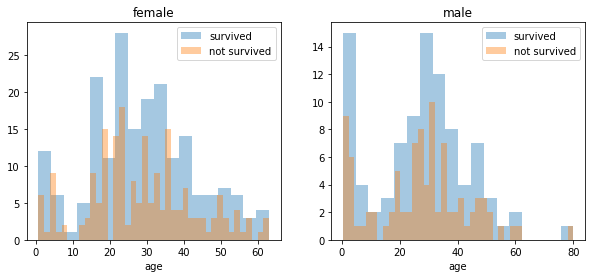

In [10]:
survived='survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']

ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('female')


ax=sns.distplot(men[men[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men[survived]==1].age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('male')

In [11]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

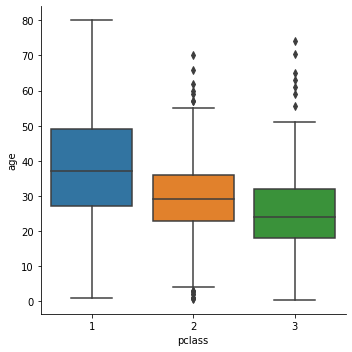

In [12]:
sns.catplot(x='pclass',y='age',data=titanic,kind='box')

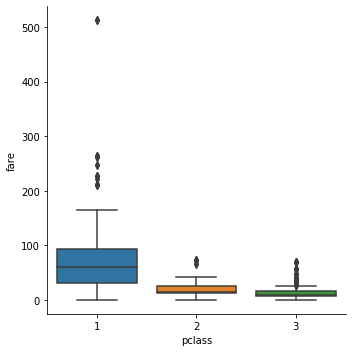

In [13]:
sns.catplot(x='pclass',y='fare',data=titanic,kind='box')

In [14]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [15]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [16]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [17]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]

    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
            
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
            
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
            
        else:
            return age
       
        
        
            

In [18]:
titanic['age'].isnull().sum()

177

In [19]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)

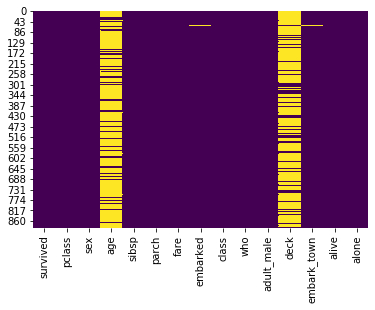

In [293]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')



# analysing emabarked

In [20]:
titanic['embarked'].isnull().sum()

2

In [21]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [22]:
common_value='S'
titanic['embarked'].fillna(common_value,inplace=True)

In [23]:
titanic['embarked'].isnull().sum()

0

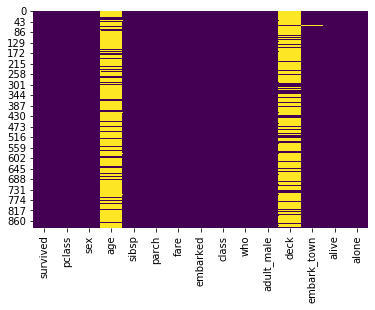

In [24]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')
       

In [25]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

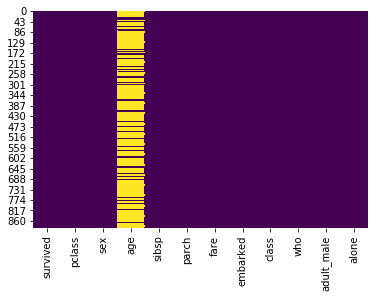

In [26]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

# feature transformation

In [27]:
titanic['fare']=titanic['fare'].astype('int')
#titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    object  
 3   age         177 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int32(2), int64(3), object(3)
memory usage: 58.5+ KB


# convert catergorical data into numerical data

In [28]:
genders={'male':0,'female': 1}
titanic['sex']=titanic['sex'].map(genders)

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,NaN,1,0,7,S,Third,man,True,False
1,1,1,1,NaN,1,0,71,C,First,woman,False,False
2,1,3,1,NaN,0,0,7,S,Third,woman,False,True
3,1,1,1,NaN,1,0,53,S,First,woman,False,False
4,0,3,0,NaN,0,0,8,S,Third,man,True,True


In [30]:
who=genders={'man':0,'womam': 1,'chid':2}
titanic['who']=titanic['who'].map(who)

In [31]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [32]:
alone={True:1,False:0}
titanic['alone']=titanic['alone'].map(alone)

In [33]:
titanic.drop(labels=['who'],inplace=True,axis=1)


In [34]:
titanic.drop(labels=['age'],inplace=True,axis=1)

In [35]:
titanic.drop(labels=['class'],inplace=True,axis=1)

In [36]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [37]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,1,0,7,0,1,0
1,1,1,1,1,0,71,1,0,0
2,1,3,1,0,0,7,0,0,1
3,1,1,1,1,0,53,0,0,0
4,0,3,0,0,0,8,0,1,1


# build logistic regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
x=titanic.drop('survived',axis=1)
y=titanic[survived]

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [40]:
X_train.shape

(596, 8)

In [41]:
model=LogisticRegression(solver='lbfgs',max_iter=200)
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)

In [261]:
model.score(X_test,Y_test)

0.8203389830508474